In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [78]:
# Read CSV
data_frame = pd.read_csv("MergedImagingData.csv").iloc[:, 1:-1]

In [79]:
# Data preprocessing - Drop missing values
data_frame = data_frame.dropna(subset = ['GOLD_STAGE_COPD_SEVERITY_batch'])
data_frame = data_frame.dropna(axis='columns', how='all')
data_np = data_frame.to_numpy()

# Data preprocessing - Fill missing values with the column mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data_np)
data_np = imp_mean.transform(data_np)

In [80]:
# Data standardisation
data_np_std = StandardScaler().fit_transform(data_np)

In [81]:
# PCA
pca = PCA(n_components=40)
principalComponents = pca.fit_transform(data_np_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = range(40))

In [82]:
# Check total variance coverage
sum(pca.explained_variance_ratio_)

0.7831035129089021

In [83]:
# K-means clustering
kmeans = KMeans(n_clusters = 4)
data_clustered = kmeans.fit_predict(principalDf)
LABEL_COLOR_MAP = {0 : 'r', 1 : 'g', 2 : 'b', 3 : 'c'}
label_color = [LABEL_COLOR_MAP[l] for l in data_clustered]

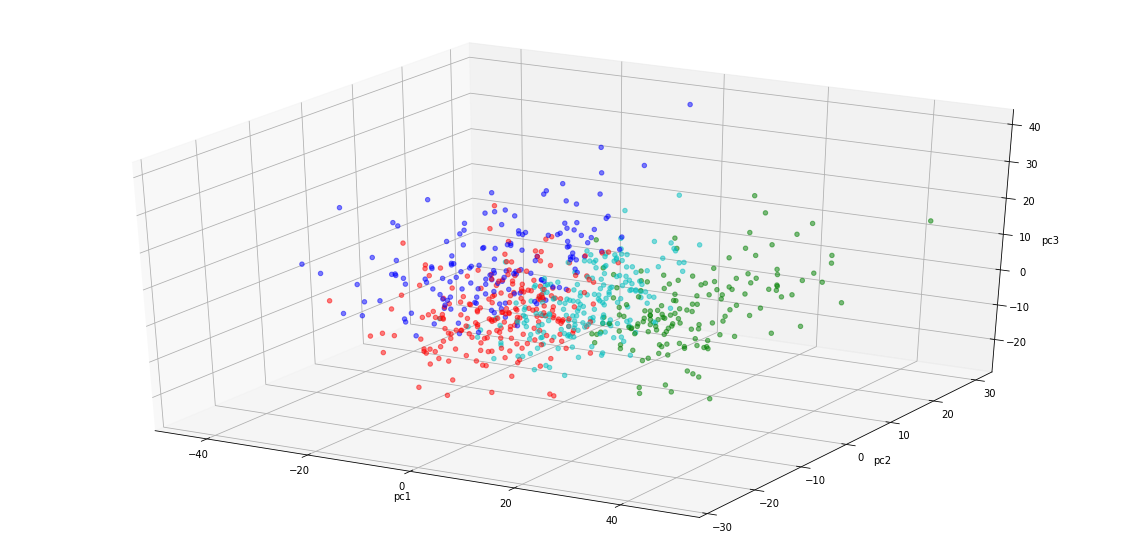

In [98]:
# Ploting
principal_matrix = principalDf.to_numpy()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_matrix[:, 0], principal_matrix[:, 1], principal_matrix[:, 2], c = label_color, alpha = 0.5, marker='o')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.show()